# Wisconsing breast cancer dataset EDA and prediction

The goal of this notebook is to perform an exploratory data analysis on the Wisconsin breast cancer dataset and to build a model to predict whether a tumor is benign or malignant. The dataset contains 30 features and 569 samples. The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

## Loading necessary libraries and the dataset

We start by loading the necessary libraries and the dataset.

To load and manipulate data, we will use `pandas` and `numpy` libraries. For visualization, we will use `matplotlib` and `seaborn`. For building the model, we will use `scikit-learn`. So, a pretty standard set of libraries for a data science project.

To enable some interactivity in the notebook, we will use `ipywidgets` library.

In [14]:
import time

import pandas as pd
import numpy as np
import ipywidgets as ipy

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.decomposition
import sklearn.model_selection
import sklearn.metrics

import scipy.stats


WISCONSIN_DATASET = "https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/d9d8bc1858a7073cf1c18799d797491e9805ea2b/Classification/Breast%20cancer%20wisconsin.csv"

wisconsin_breast_cancer_data = pd.read_csv(WISCONSIN_DATASET, index_col=[0])

pd.set_option('display.max_columns', wisconsin_breast_cancer_data.shape[1] + 1)
plt.style.use('ggplot')

wisconsin_breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Preliminary look into data

First, a preliminary look into the data is taken i.e. find out how many rows and columns of data are present, are there any missing values, what are the data types of the columns, etc.

In [15]:
print(f"Number of rows: {wisconsin_breast_cancer_data.shape[0]}")
print(f"Number of columns: {wisconsin_breast_cancer_data.shape[1]}")

no_nans_present = np.all(
    wisconsin_breast_cancer_data.isna().sum() == 0
)

print(f"No NaNs present in the dataset: {no_nans_present}")

print(wisconsin_breast_cancer_data.dtypes)

wisconsin_breast_cancer_data.describe()

Number of rows: 569
Number of columns: 32
No NaNs present in the dataset: True
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Clean data

Next, we clean the data. This includes removing any missing values, converting data types, etc.

In case of this dataset, there are no missing values, so we don't need to do anything here.
However, it is always a good practice to check for missing values and handle them if they are present.

The text `diagnosis` is converted to numerical values. `M` is converted to 1 and `B` is converted to 0, using `pandas` one-hot encoding method of `DataFrame` class.
This is further simplified, by using the fact that `benign` is just the opposite of `malignant`, so the former column can be dropped. However, to be sure that no data is lost, we check if there are any columns that have identical values for those columns in case of tumor diagnosis being inconclusive (which could be a possiblity).

In [16]:
print(f"Rows before cleaning: {wisconsin_breast_cancer_data.shape[0]}")

# Drop duplicates
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop_duplicates()

# Drop rows with missing values
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.dropna()

print(f"Rows after cleaning: {wisconsin_breast_cancer_data.shape[0]}")

# One-hot encode categorical columns
wisconsin_breast_cancer_data = pd.get_dummies(wisconsin_breast_cancer_data, columns=['diagnosis'], dtype=int).rename({
    'diagnosis_B': 'benign',
    'diagnosis_M': 'malignant'
}, axis=1)

# Check if there are rows with inclonclusive diagnosis and drop them
inconclusive_diagnosis = wisconsin_breast_cancer_data.query(
    '(benign == 1 and malignant == 1) or (benign == 0 and malignant == 0)'
)

print(f"Rows with inconclusive diagnosis: {inconclusive_diagnosis.shape[0]}")

wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(inconclusive_diagnosis.index)

# Since malignant = ~benign, we can drop one of the columns
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop('benign', axis=1)
wisconsin_breast_cancer_data

# Remove id column
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop('id', axis=1)

# Get names of columns with numerical data
numerical_columns = wisconsin_breast_cancer_data.select_dtypes(include=[np.number]).columns
wisconsin_breast_cancer_data

Rows before cleaning: 569
Rows after cleaning: 569
Rows with inconclusive diagnosis: 0


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


## Check if numerical data distribution is normal

A classic assumption in statistics is that the data is normally distributed. This is important for some statistical tests and for the performance of some models. We will check if the data is normally distributed by graphing histograms of the numerical data columns. The diagnosis graph is also made to quickly see if the data is balanced.

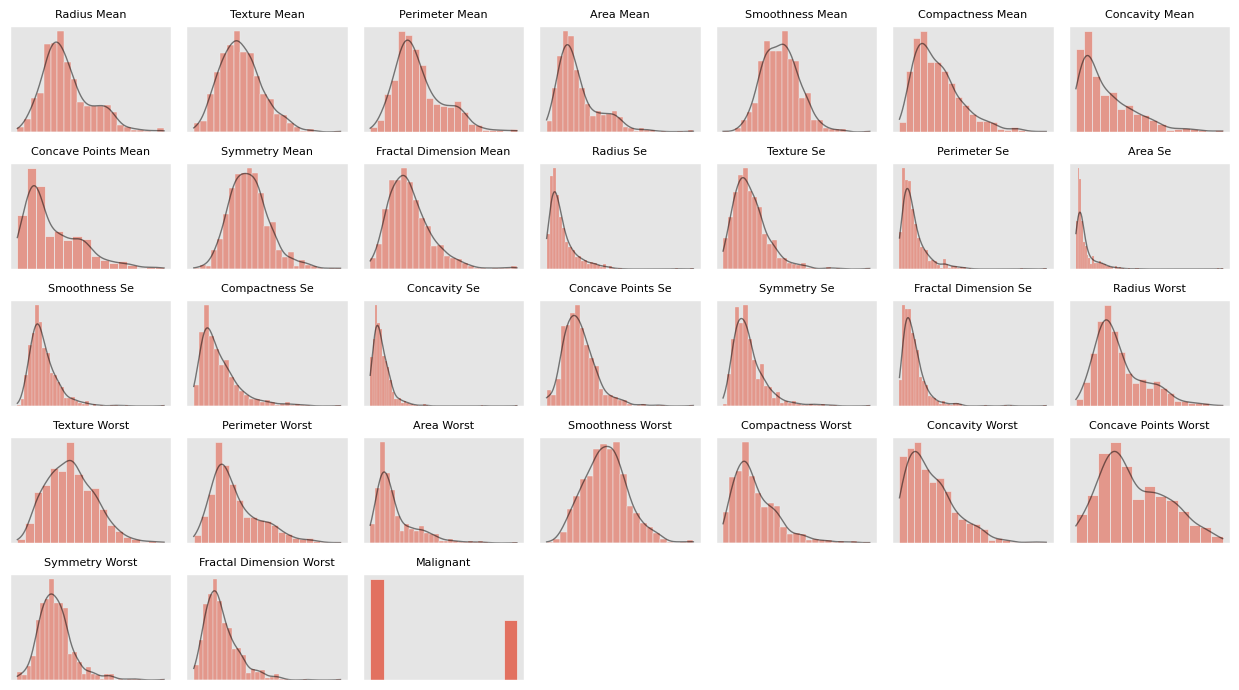

In [17]:
# Plot histograms for each feature)

NUMBER_OF_ROWS = np.sqrt(wisconsin_breast_cancer_data.columns.shape[0]).astype(int)
NUMBER_OF_COLUMNS = np.ceil(wisconsin_breast_cancer_data.columns.shape[0] / NUMBER_OF_ROWS).astype(int)

fig, axes = plt.subplots(NUMBER_OF_ROWS, NUMBER_OF_COLUMNS, figsize=(NUMBER_OF_ROWS * 2.5, NUMBER_OF_COLUMNS))
for i, column in enumerate(wisconsin_breast_cancer_data.columns):
    indices = np.unravel_index(i, (NUMBER_OF_ROWS, NUMBER_OF_COLUMNS))
    sns.histplot(
        wisconsin_breast_cancer_data[column],
        kde=column != 'malignant',
        ax=axes[indices]
    )
    axes[indices].set_title(column.replace('_', ' ').title(), fontsize=8)
    axes[indices].set_xlabel('')
    axes[indices].set_ylabel('')
    axes[indices].set_yticks([])
    axes[indices].set_xticks([])
    if column != 'malignant':
        axes[indices].lines[0].set_color('black')
        axes[indices].lines[0].set_linewidth(1)
        axes[indices].lines[0].set_alpha(0.5)
for i in range(wisconsin_breast_cancer_data.columns.shape[0], NUMBER_OF_ROWS * NUMBER_OF_COLUMNS):
    indices = np.unravel_index(i, (NUMBER_OF_ROWS, NUMBER_OF_COLUMNS))
    fig.delaxes(axes[indices])
fig.tight_layout()

So here we can see that most features are skewed towards the left, meaning that an additional transformation might be necessary to make the data more normally distributed.

Since the distributions are heavily, negatively skewed, we will use the power transformation to make the data more normally distributed. To do this we will use `sklearn` library, more specifically the Yeo-Johnson transformation via `PowerTransformer` class (due to presence of zero values in the data).

**NOTE**: We don't transform the target variable, as it is a categorical variable!

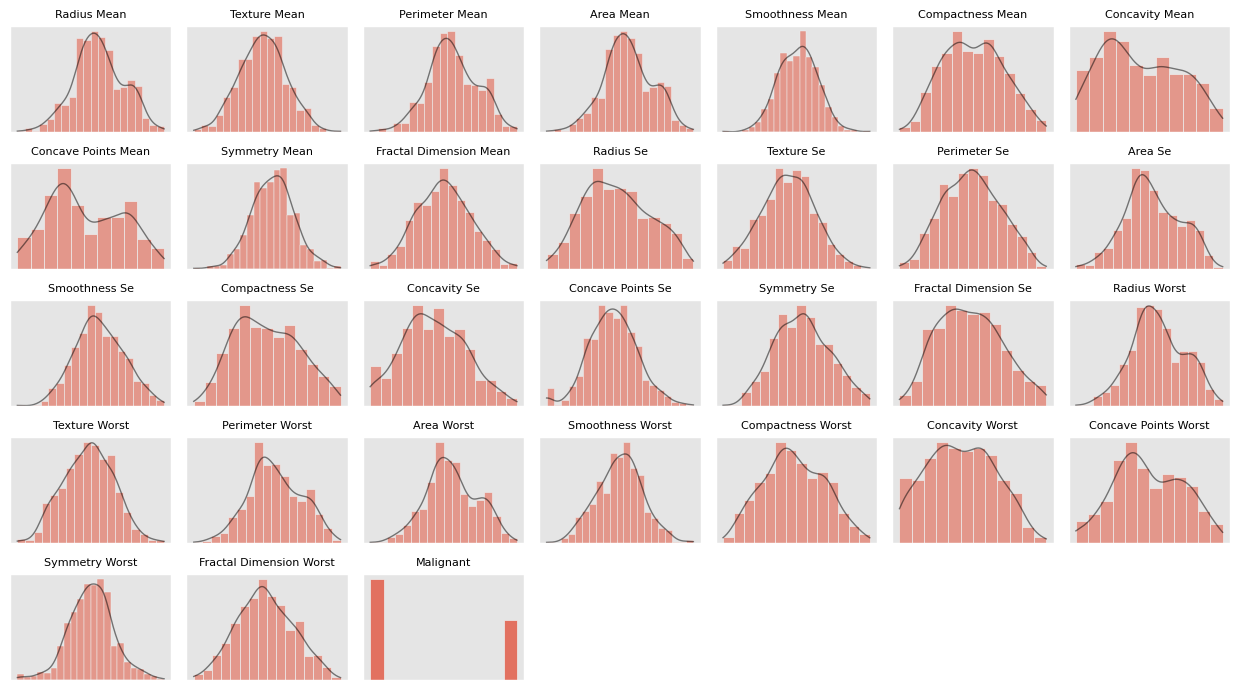

In [18]:
def power_transform_on_non_normal_data(values: pd.Series):
    if scipy.stats.normaltest(values).pvalue < 0.05:
        return scipy.stats.yeojohnson(values)[0]
    return values

# Apply power transform to non-normal data
for column in wisconsin_breast_cancer_data.columns:
    if column != 'malignant':
        wisconsin_breast_cancer_data[column] = power_transform_on_non_normal_data(wisconsin_breast_cancer_data[column])

# Plot histograms for each feature after power transform
NUMBER_OF_ROWS = np.sqrt(wisconsin_breast_cancer_data.columns.shape[0]).astype(int)
NUMBER_OF_COLUMNS = np.ceil(wisconsin_breast_cancer_data.columns.shape[0] / NUMBER_OF_ROWS).astype(int)

fig, axes = plt.subplots(NUMBER_OF_ROWS, NUMBER_OF_COLUMNS, figsize=(NUMBER_OF_ROWS * 2.5, NUMBER_OF_COLUMNS))

for i, column in enumerate(wisconsin_breast_cancer_data.columns):
    indices = np.unravel_index(i, (NUMBER_OF_ROWS, NUMBER_OF_COLUMNS))
    sns.histplot(
        wisconsin_breast_cancer_data[column],
        kde=column != 'malignant',
        ax=axes[indices],
    )
    axes[indices].set_title(column.replace('_', ' ').title(), fontsize=8)
    axes[indices].set_xlabel('')
    axes[indices].set_ylabel('')
    axes[indices].set_yticks([])
    axes[indices].set_xticks([])
    if column != 'malignant':
        axes[indices].lines[0].set_color('black')
        axes[indices].lines[0].set_linewidth(1)
        axes[indices].lines[0].set_alpha(0.5)
for i in range(wisconsin_breast_cancer_data.columns.shape[0], NUMBER_OF_ROWS * NUMBER_OF_COLUMNS):
    indices = np.unravel_index(i, (NUMBER_OF_ROWS, NUMBER_OF_COLUMNS))
    fig.delaxes(axes[indices])
fig.tight_layout()

The power transformation helped to make the data more normally distributed, so now we can move on to standardizing the data for the purposes of training a future prediction model.

## Standardize and normalize the data

To let the model perform better, we standardize and normalize the data. This is done to ensure that the model doesn't get biased towards features with higher values.

The **standardization** is done by subtracting the mean and dividing by the standard deviation. This makes the mean of each feature 0 and the standard deviation 1.

The **normalization** is done by scaling the features to lie between 0 and 1 via standard min-max scaling. 

In [19]:
# Standardize numerical columns
wisconsin_breast_cancer_data[numerical_columns] = (wisconsin_breast_cancer_data[numerical_columns] - wisconsin_breast_cancer_data[numerical_columns].mean()) / wisconsin_breast_cancer_data[numerical_columns].std()

# Normalize numerical columns
wisconsin_breast_cancer_data[numerical_columns] = (wisconsin_breast_cancer_data[numerical_columns] - wisconsin_breast_cancer_data[numerical_columns].min()) / (wisconsin_breast_cancer_data[numerical_columns].max() - wisconsin_breast_cancer_data[numerical_columns].min())

wisconsin_breast_cancer_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,malignant
0,0.747299,0.046701,0.772944,0.742563,0.709664,0.943875,0.931423,0.926537,0.821907,0.848371,0.904983,0.356000,0.875353,0.876561,0.555049,0.814643,0.682502,0.585630,0.793247,0.772044,0.852934,0.231262,0.879387,0.846608,0.698073,0.886763,0.819862,0.947632,0.839369,0.816728,1.0
1,0.829199,0.428532,0.818333,0.827003,0.400678,0.425554,0.515874,0.668701,0.553689,0.324283,0.695860,0.266946,0.634739,0.763562,0.454783,0.323540,0.332235,0.521924,0.347561,0.521333,0.845519,0.435358,0.811003,0.839202,0.447129,0.421436,0.436636,0.753279,0.485582,0.590497,1.0
2,0.803072,0.556982,0.805833,0.798336,0.637861,0.740216,0.809929,0.885037,0.681710,0.446715,0.807611,0.296208,0.727950,0.804905,0.535438,0.743525,0.561395,0.687550,0.646102,0.641769,0.816741,0.496551,0.791440,0.806774,0.588433,0.734439,0.652509,0.898020,0.690022,0.574628,1.0
3,0.427091,0.526919,0.473383,0.416022,0.879472,0.950360,0.873073,0.819797,0.880956,1.000000,0.658489,0.461990,0.639346,0.531369,0.722202,0.928450,0.700959,0.649046,0.979311,0.901516,0.544509,0.523200,0.546370,0.479863,0.943890,0.957318,0.807139,0.930557,1.000000,0.968123,1.0
4,0.821070,0.275258,0.827552,0.820544,0.555435,0.658590,0.810936,0.816768,0.552048,0.406362,0.812354,0.293194,0.774234,0.805617,0.816931,0.553084,0.702630,0.652831,0.497257,0.692178,0.793921,0.205832,0.790476,0.786441,0.542246,0.455671,0.609084,0.684650,0.360256,0.434792,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.856661,0.594591,0.855091,0.858463,0.649672,0.597290,0.876086,0.910110,0.505150,0.306379,0.918459,0.498027,0.853324,0.880946,0.774366,0.617029,0.670711,0.756742,0.206789,0.607018,0.854243,0.520490,0.832126,0.847527,0.566226,0.466884,0.618692,0.846986,0.241579,0.344781,1.0
565,0.816349,0.762163,0.811054,0.812276,0.532050,0.545823,0.699119,0.794144,0.520153,0.268429,0.815662,0.775435,0.762717,0.813310,0.503760,0.546944,0.572184,0.607208,0.545491,0.361147,0.819288,0.796031,0.799360,0.809910,0.393715,0.432097,0.531334,0.685563,0.430956,0.257246,1.0
566,0.695520,0.757809,0.697241,0.694122,0.398647,0.541020,0.537862,0.562420,0.421741,0.316603,0.623597,0.430397,0.637397,0.678117,0.515138,0.716826,0.636876,0.578301,0.313814,0.567078,0.698944,0.709021,0.694988,0.696330,0.373111,0.613248,0.551200,0.619185,0.305704,0.455487,1.0
567,0.830060,0.789231,0.847707,0.813209,0.704948,0.943241,0.966201,0.935531,0.814084,0.712216,0.799263,0.600534,0.789267,0.790400,0.564431,0.882970,0.778558,0.603951,0.664255,0.771535,0.859604,0.819290,0.879387,0.822204,0.714358,0.957810,0.913796,0.946778,0.770339,0.841005,1.0


For visualization purposes and getting first hints about which features could be important in distribution of benign and malignant tumors, we plot violin plots for each feature, for both diagnosis classes. This very shallow look points to a relationship between the diagnosis and:

* radius / perimeter / area features, so information connected with the size of the tumor
* compactness / concavity / concave points, so information connected with the shape of the tumor

The smoothness / symmetry / fractal dimension features don't seem to be very important in distinguishing between benign and malignant tumors, since their distributions are very similar for both classes (or atleast their quartiles are).

We will keep that in mind when making any further judgements.

Next, a rather radical decision is made - only means of features are kept as measures of their central tendency. This is done to reduce the number of features and to make the model simpler. This is a trade-off between model complexity and accuracy. This is done by dropping all columns that don't have `mean` in their name.

In [20]:
wisconsin_breast_cancer_data_copy = wisconsin_breast_cancer_data.copy()

# Drop columns with _se and _worst suffixes
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(
    wisconsin_breast_cancer_data.filter(like='_se').columns, axis=1
).drop(
    wisconsin_breast_cancer_data.filter(like='_worst').columns, axis=1
)

def plot_violin_against_diagnosis(feature):
    feature_name = feature.replace('_', ' ').title()
    ax = sns.violinplot(x="malignant", y=feature, data=wisconsin_breast_cancer_data_copy)
    ax.set(title=f"{feature_name} against diagnosis")
    ax.set(xlabel="Is malignant", ylabel=feature_name)

ipy.interact(plot_violin_against_diagnosis, feature=wisconsin_breast_cancer_data_copy.columns.drop('malignant'))

interactive(children=(Dropdown(description='feature', options=('radius_mean', 'texture_mean', 'perimeter_mean'…

<function __main__.plot_violin_against_diagnosis(feature)>

## Quantities connected with size i.e. tumor radius

Looking at the names of the columns, we can see that there are 3 columns that are connected with the size of the tumor - `radius`, `perimeter` and `area`. We will check if these columns are correlated and if they are, we will keep only one of them. Here, we make a consciouss decision to keep the `radius` column, since it is the most basic measure of the size of the tumor (the area and perimeter are derived from the radius).

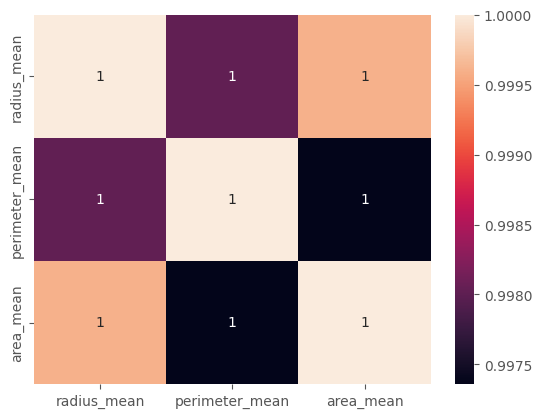

In [21]:
radius_dependent_features = [
    'radius_mean',
    'perimeter_mean',
    'area_mean'
]

# Checking the correlation between the radius columns
radius_correlation = wisconsin_breast_cancer_data[radius_dependent_features].corr()
radius_correlation_heatmap = sns.heatmap(radius_correlation, annot=True)

# We can safely drop the perimeter and area columns as they are highly correlated with the radius column
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(columns=['perimeter_mean', 'area_mean'])

As expected the `radius`, `perimeter` and `area` columns are highly correlated, so we will keep only the `radius` column (hence the `drop` method is used to remove the other two columns).

## Quantities connected with surface properties

We can do a similar thing with data connected to the surface properties of the tumor. We will check if the `compactness`, `concavity` and `concave points` columns.

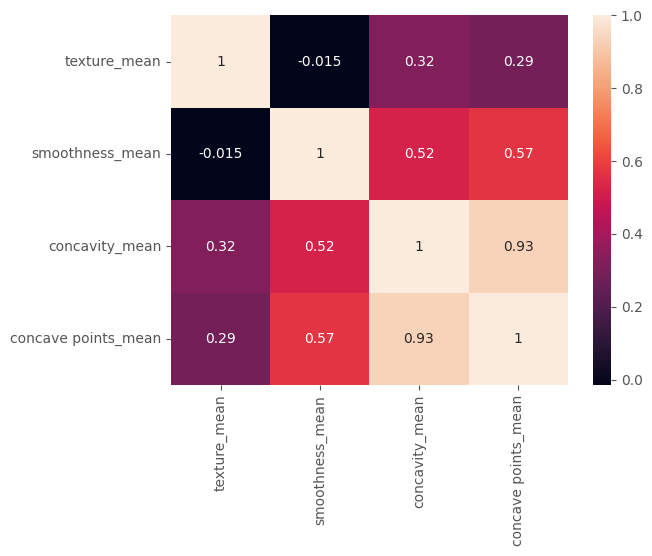

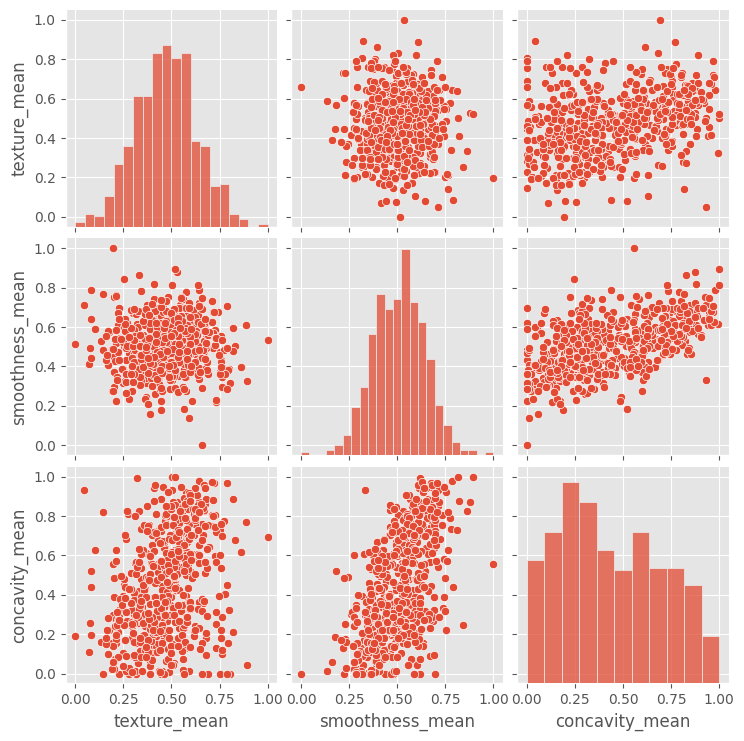

In [22]:
MODERATE_THRESHOLD = 0.5
STRONG_THRESHOLD = 0.9

surface_oriented_features = [
    'texture_mean',
    'smoothness_mean',
    'concavity_mean',
    'concave points_mean'
]

# Checking the correlation between the surface oriented columns
sns.heatmap(wisconsin_breast_cancer_data[surface_oriented_features].corr(), annot=True)

# Concavity and concave points are highly correlated, check the coefficient
concavity_concave_points_correlation = wisconsin_breast_cancer_data[['concavity_mean', 'concave points_mean']].corr()

# We can safely drop the concave points column as it is highly correlated with the concavity column
wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(columns=['concave points_mean'])

# Plotting the pairplot of the surface oriented features
surface_oriented_features.remove('concave points_mean')
sns.pairplot(wisconsin_breast_cancer_data, vars=surface_oriented_features)

No, one pair of the measures that are highly correlated are `concavity_mean` and `concave_points_mean`, which is expected, since the concavity is a measure of the concave points. We will keep only the `concavity_mean` column, since it is the most basic measure of the surface properties of the tumor. As for the rest of the measures, we can see that there is some moderate correlation between them, but not enough to warrant removing any of them.

As it can be seen in the constant variables defined at the top of the pair plot creation cell, the high correlation is defined as the value of Pearson coefficient exceeding the threshold of 0.9. Only the aforementioned pair of features (logically) exceeds this threshold.

In [23]:
# Checking which properties are left
important_features = wisconsin_breast_cancer_data.columns.str.replace('_mean', '')

all_columns_with_features = wisconsin_breast_cancer_data.columns[
    wisconsin_breast_cancer_data.columns.str.contains('|'.join(important_features)) | wisconsin_breast_cancer_data.columns.str.contains('diagnosis')
]

wisconsin_breast_cancer_data = wisconsin_breast_cancer_data[all_columns_with_features]
wisconsin_breast_cancer_data

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,malignant
0,0.747299,0.046701,0.709664,0.943875,0.931423,0.821907,0.848371,1.0
1,0.829199,0.428532,0.400678,0.425554,0.515874,0.553689,0.324283,1.0
2,0.803072,0.556982,0.637861,0.740216,0.809929,0.681710,0.446715,1.0
3,0.427091,0.526919,0.879472,0.950360,0.873073,0.880956,1.000000,1.0
4,0.821070,0.275258,0.555435,0.658590,0.810936,0.552048,0.406362,1.0
...,...,...,...,...,...,...,...,...
564,0.856661,0.594591,0.649672,0.597290,0.876086,0.505150,0.306379,1.0
565,0.816349,0.762163,0.532050,0.545823,0.699119,0.520153,0.268429,1.0
566,0.695520,0.757809,0.398647,0.541020,0.537862,0.421741,0.316603,1.0
567,0.830060,0.789231,0.704948,0.943241,0.966201,0.814084,0.712216,1.0


We can see that a drastic reduction of overall features has taken place - from 32 to 7 significant features, which will make the model simpler and more interpretable.
Due to the fact that there is now no straight forward way to filter out additional measures, we will keep all of them and perform alternative methods of feature selection in the future.

## General correlation between quantities

Now we will perform a general correlation analysis between all the features. This will give us a better understanding of the relationships between the features and will help us to understand which features are important for the prediction model. If there are **any** features that are highly correlated, we will remove one of them.

To visualize the correlation, we will use a heatmap. The `seaborn` library has a very nice function for this - `heatmap`. We will use the `pearson` correlation coefficient to measure the correlation between the features. Using the `applymap` method of the `DataFrame` we will quickly translate the values of the correlation matrix to a more readable format - `W`(eak), `M`(oderate) and `S`(trong) correlation labels to be overlaid on the heatmap.

/tmp/ipykernel_106064/1787908066.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: 'W' if x < MODERATE_THRESHOLD else 'M' if x < STRONG_THRESHOLD else 'S')


<Axes: >

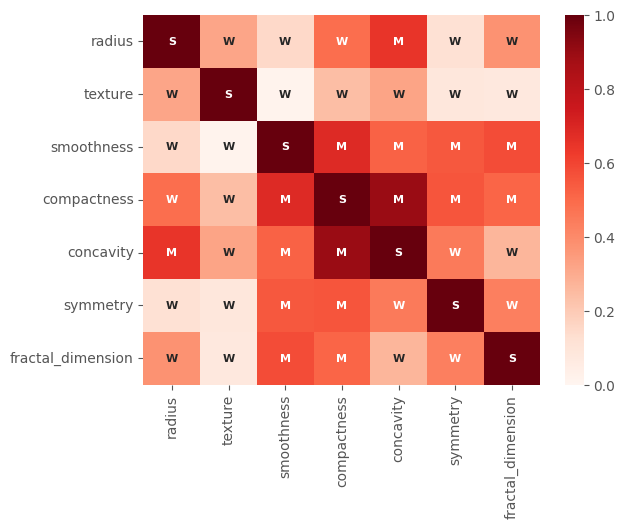

In [24]:
numeric_values = wisconsin_breast_cancer_data[
    wisconsin_breast_cancer_data.columns[
        wisconsin_breast_cancer_data.columns.str.contains('|'.join(important_features))
    ]
]
means = numeric_values[
    numeric_values.columns[
        numeric_values.columns.str.contains('mean')
    ]
]
means.columns = means.columns.str.replace('_mean', '')

# Showing three heatmaps in one figure
correlation_coefficients = means.corr()

# Categorize coefficients into three categories: weak, moderate, and strong
def categorize_coefficients(coefficients: pd.DataFrame) -> pd.DataFrame:
    return coefficients\
        .abs()\
        .applymap(lambda x: 'W' if x < MODERATE_THRESHOLD else 'M' if x < STRONG_THRESHOLD else 'S')

categorized_coefficients = categorize_coefficients(correlation_coefficients)
sns.heatmap(
    data=correlation_coefficients.abs(),
    fmt = '',
    annot=categorized_coefficients,
    annot_kws={
        "size": 8,
        "weight": "bold"
    },
    cmap='Reds',
    vmin=0.0,
    vmax=1.0
)

Here we will loosen the feature reduction threshold a little bit to the moderate level, since we want to keep as many features as possible, but still want to remove any redundant ones. If the model will perform poorly, we will come back to this step and go back to raising the elimination threshold.

In [25]:
# Check the correlation between the features and the diagnosis
correlation_with_diagnosis = wisconsin_breast_cancer_data.corr()['malignant'].abs().sort_values(ascending=False)

# Drop the features with low correlation with the diagnosis
lowly_correlated_features = correlation_with_diagnosis[correlation_with_diagnosis < MODERATE_THRESHOLD].index

wisconsin_breast_cancer_data = wisconsin_breast_cancer_data.drop(columns=lowly_correlated_features)
wisconsin_breast_cancer_data

,radius_mean,compactness_mean,concavity_mean,malignant
0,0.747299,0.943875,0.931423,1.0
1,0.829199,0.425554,0.515874,1.0
2,0.803072,0.740216,0.809929,1.0
3,0.427091,0.950360,0.873073,1.0
4,0.821070,0.658590,0.810936,1.0
...,...,...,...,...
564,0.856661,0.597290,0.876086,1.0
565,0.816349,0.545823,0.699119,1.0
566,0.695520,0.541020,0.537862,1.0
567,0.830060,0.943241,0.966201,1.0


From 32 features to 3 - a drastic reduction of features has taken place. This is a very good result, since the model will be very simple and interpretable. The features that are left are (taken from the dataset description):

1. radius (mean of distances from center to points on the perimeter)
2. compactness (perimeter^2 / area - 1.0)
3. concavity (severity of concave portions of the contour)

A suprising fact is that compactness and radius should be highly correlated due to the fact that the first one shows up in the formula for the second one. However, the correlation between them is only moderate, so we will keep both of them.

## Permutation tests

We will perform permutation tests to check if the features are significantly different for the two classes of diagnosis. In other words, we will calculate the differences of medians of the remaining features to see if they are significantly different for the two classes. This will give us a better understanding of the importance of the features for the prediction model.

If the differences of medians come from the fact that they have a realy influence on the diagnosis, then the differences of medians will be significantly different from 0. If the differences of medians come from the fact that they are random - the differences of medians will be close to 0.

The permutation test is a non-parametric test, so it doesn't assume anything about the distribution of the data. It is a very powerful test, but it is also computationally expensive. We will limit our calculation to 1000 iterations, since we don't have a lot of data.

Why medians and not means, though? Well, the medians are more robust to outliers, so they are a better measure of central tendency in this case - the tumor sizes can vary a lot and the means can be heavily influenced by the outliers (even though we have already transformed the data to be more normally distributed). It is better to be safe than sorry.

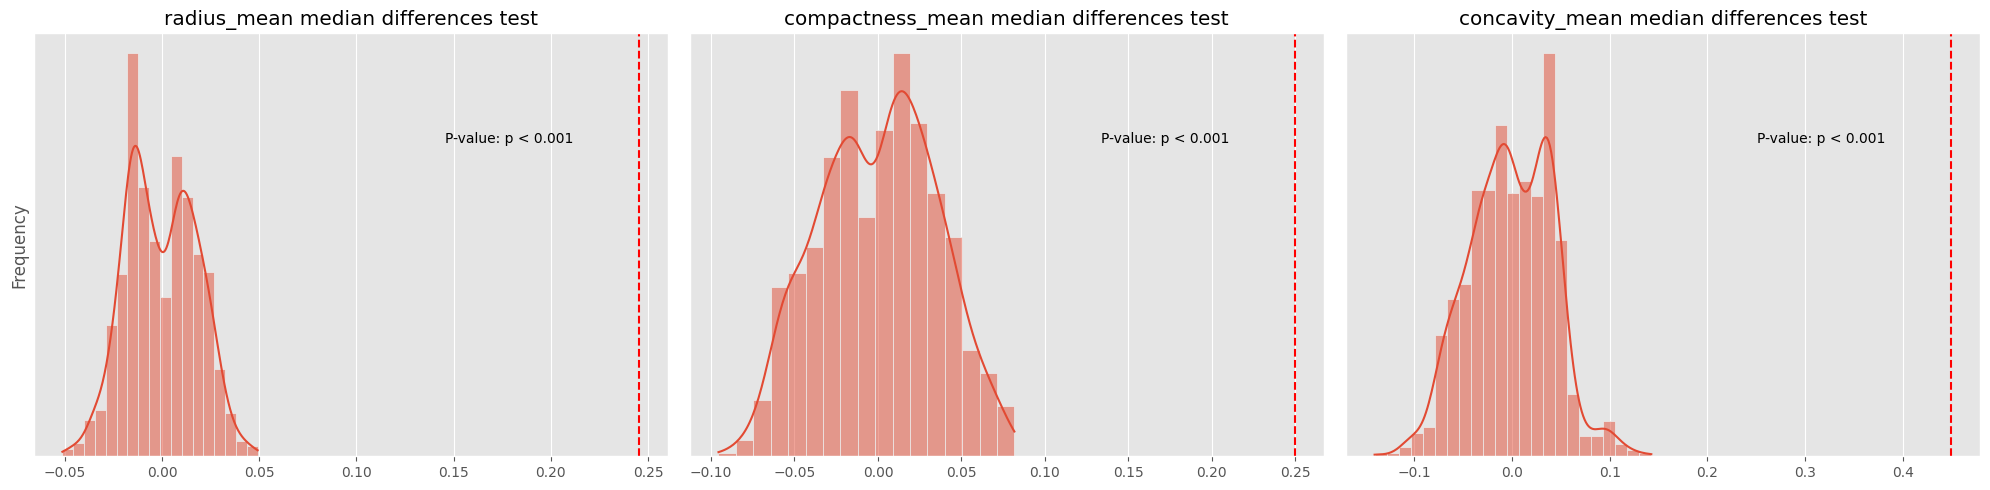

In [26]:
number_of_permutations = 1000
columns_without_diagnosis = wisconsin_breast_cancer_data.columns.drop('malignant')

observed_malignant_medians = wisconsin_breast_cancer_data.query('malignant == 1')[columns_without_diagnosis].median()
observed_benign_medians = wisconsin_breast_cancer_data.query('malignant == 0')[columns_without_diagnosis].median()
number_of_observations_to_sample = wisconsin_breast_cancer_data.query('malignant == 1').shape[0]

# Calculate the observed medians
observed_medians_differences = observed_malignant_medians - observed_benign_medians

calculated_median_differences = {
    f'{column}_median': []
    for column in columns_without_diagnosis
}
for _ in range(number_of_permutations):
    pseudo_malignant_samples = wisconsin_breast_cancer_data.sample(
        n=number_of_observations_to_sample, replace=False
    )
    pseudo_benign_samples = wisconsin_breast_cancer_data.drop(pseudo_malignant_samples.index)
    permutation_medians = pseudo_malignant_samples[columns_without_diagnosis].median() - pseudo_benign_samples[columns_without_diagnosis].median()
    for column in columns_without_diagnosis:
        calculated_median_differences[f'{column}_median'].append(permutation_medians[column])

# Plot the observed medians and the calculated medians
fig, axes = plt.subplots(1, len(columns_without_diagnosis), figsize=(20, 5))
for i, column in enumerate(columns_without_diagnosis):
    sns.histplot(calculated_median_differences[f'{column}_median'], kde=True, ax=axes[i])
    axes[i].axvline(observed_medians_differences[column], color='red', linestyle='--')
    axes[i].set_title(f'{column} median differences test')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_yticks([])
    p_value = (
        np.sum(calculated_median_differences[f'{column}_median'] >= observed_medians_differences[column])
    ) / number_of_permutations
    axes[i].text(
        0.75, 0.75,
        f'P-value: {p_value:.4f}' if p_value >= 0.001 else 'P-value: p < 0.001',
        horizontalalignment='center',
        verticalalignment='center',
        transform=axes[i].transAxes
    )
axes[0].set_ylabel('Frequency')
fig.tight_layout()

We can see that the probability that the differences between means come from the fact that they are random is very low (p-value is < 0.001), so we can conclude that the differences between means are significant and that the features are important for the prediction model.

Another interesting result is that distributions of medians are bimodal in case of `radius` and `concavity`, which means that there are two distinct groups of tumors in the dataset. This is a very interesting result and it could be a very important insight for the prediction model or future research.

## Dimensionality reduction

We will perform dimensionality reduction to visualize the data in 2D. First, we will split our data into training and testing sets by ratio of 80:20. Then we will perform PCA to reduce the dimensionality of the data to 2D, using the `PCA` class from the `sklearn.decomposition` module. An additional parameter called `stratify` is used to ensure that the distribution of the classes in the training and testing sets is the same.

To keep things more general, we will not limit the number of components to a certain value or use the 'mle' option, but we will use the `explained_variance_ratio_` attribute of the `PCA` class to see how many components we need to keep to explain a set threshold of the variance in the data, using a method similar to the elbow method.

Since there are no limitations put in place - the number of components will be equal to the number of features, which is 3.

In [27]:
train_data, test_data = sklearn.model_selection.train_test_split(wisconsin_breast_cancer_data, test_size=0.2, random_state=42, stratify=wisconsin_breast_cancer_data['malignant'])

features = train_data.drop('malignant', axis=1)

pca_model = sklearn.decomposition.PCA(n_components=columns_without_diagnosis.shape[0])
pca_features = pca_model.fit_transform(features)
pca_features = pd.DataFrame(pca_features, columns=[
    f'PC{i + 1}' for i in range(pca_features.shape[1])
], index=train_data.index)

reduced_train_data = pd.concat([pca_features, train_data['malignant']], axis=1)
reduced_train_data

,PC1,PC2,PC3,malignant
10,-0.186237,-0.184401,-0.054547,1.0
170,-0.209206,-0.004317,0.008795,0.0
407,-0.069266,0.010818,0.023165,0.0
430,0.584331,0.147628,0.020849,1.0
27,0.314081,-0.136517,0.078737,1.0
...,...,...,...,...
37,-0.384321,-0.144354,0.095895,0.0
415,-0.252227,0.037524,-0.088300,0.0
458,-0.404719,-0.111720,-0.035865,0.0
476,-0.015162,-0.005701,-0.122855,0.0


Now we prepare the cumulative variance explained plot, to see how many components we need to keep to explain a certain threshold of the variance in the data. We will use the `explained_variance_ratio_` attribute of the `PCA` class to get the explained variance ratio for each component.

We will choose the minimum number of components to explain at least 95% of the variance in the data (as seen in the `CUMULATIVE_VARIANCE_THRESHOLD`). This is a very common threshold for the explained variance in the data. We will use the `cumsum` method of the `numpy` library to calculate the cumulative sum of the explained variance ratio.

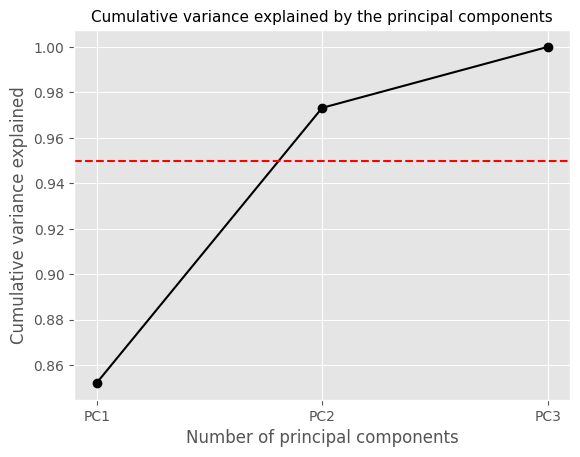

Number of principal components that explain 95.00% of the variance: 2


In [28]:
# Plot cumulative variance explained by the principal components

CUMULATIVE_VARIANCE_THRESHOLD = 0.95

cumulative_variance_explained = pd.Series(np.cumsum(pca_model.explained_variance_ratio_), index=pca_features.columns)
plt.plot(cumulative_variance_explained, color='black', marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.title('Cumulative variance explained by the principal components', fontsize=11)
plt.axhline(CUMULATIVE_VARIANCE_THRESHOLD, color='red', linestyle='--')
plt.show()

# Get the number of principal components that explain the target variance
number_of_principal_components = cumulative_variance_explained[cumulative_variance_explained < CUMULATIVE_VARIANCE_THRESHOLD].shape[0] + 1
print(f"Number of principal components that explain {CUMULATIVE_VARIANCE_THRESHOLD * 100:.2f}% of the variance: {number_of_principal_components}")

This test shows us that we need only 2 out of 3 components to explain at least 95% of the variance in the data. This is a very good result, since we can visualize the data in 2D.

Text(0.5, 1.02, 'Principal components against each other')

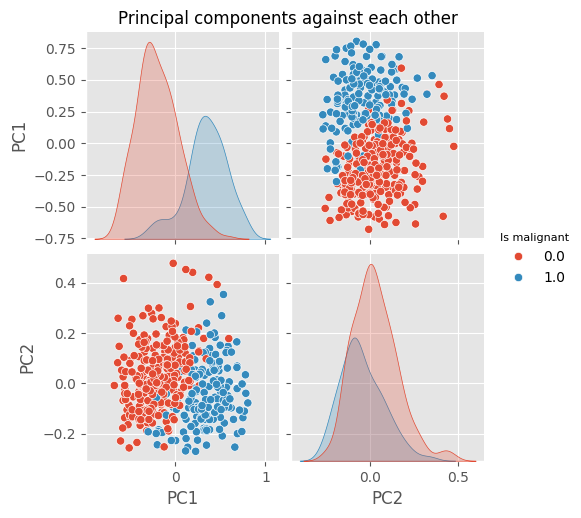

In [29]:
# Plot principal components against each other
train_pca_features = pca_features.iloc[:, :number_of_principal_components]
reduced_train_data = pd.concat([train_pca_features, train_data['malignant']], axis=1)
ax = sns.pairplot(reduced_train_data, hue='malignant')
ax.legend.set_title('Is malignant', prop={'size': 8})
ax.figure.suptitle('Principal components against each other', y=1.02)

Looking at the scatter plot, we can see that the data is very well separated in 2D - the prinicipal components are able to separate the data very well. This is a very good result, since the model will be able to learn the patterns in the data relatively quickly.

# Training the model - logistic regression

Malignant or not - this is a binary classification problem, so we will use the logistic regression model to predict the diagnosis of the tumor. We will use the `LogisticRegression` class from the `sklearn.linear_model` module to train the model.

We will use the `fit` method of the `LogisticRegression` class to train the model on the training data. We will use the `predict` method of the `LogisticRegression` class to predict the diagnosis of the tumor on the testing data.

In [30]:
# Train a logistic regression model
simplified_logistic_regression_model = sklearn.linear_model.LogisticRegression()

start_time = time.time()
simplified_logistic_regression_model.fit(reduced_train_data.iloc[:, :number_of_principal_components], reduced_train_data['malignant'])
simplified_logistic_regression_model_training_time = time.time() - start_time

# Test the model

## Transform the test data
test_features = test_data.drop('malignant', axis=1)
test_pca_features = pca_model.transform(test_features)

## Remove unnecessary principal components
test_pca_features = pd.DataFrame(test_pca_features, columns=pca_features.columns, index=test_data.index)
test_pca_features = test_pca_features.iloc[:, :number_of_principal_components]

## Predict the test data
predicted_test_data = sklearn.model_selection.cross_val_predict(
    simplified_logistic_regression_model, test_pca_features, test_data['malignant'], cv=10
)

Having the predicted diagnosis, we can do the accuracy bar plot to visually see how accurate is our model i.e. what is the ratio between the correctly and incorrectly predicted diagnosis.

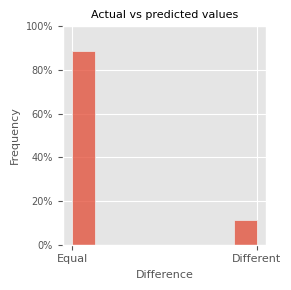

In [31]:
# Show actual and predicted values
actual_vs_predicted = pd.Series(
    abs(test_data['malignant'] - predicted_test_data),
    name='Actual vs predicted'
)

# Plot the predicted vs actual values
fig = plt.figure(figsize=(3, 3))
ax = sns.histplot(actual_vs_predicted, kde=False, stat='probability')
ax.set_title('Actual vs predicted values', fontsize=8)
ax.set_xlabel('Difference', fontdict={'size': 8})
ax.set_ylabel('Frequency', fontdict={'size': 8})
ax.set_xticks([0, 1])
ax.set_xticklabels(['Equal', 'Different'], fontdict={'size': 8})
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(pd.Series(ax.get_yticks()).apply(
    lambda x: f'{x * 100:.0f}%',
), fontdict={'size': 7})
fig.tight_layout()

We can see that accuracy of the model is very high - above 90%. This is a very good result, since the model is able to predict the diagnosis of the tumor very well.
However, we will also calculate the confusion matrix to see how many false positives and false negatives the model has made.

The confusion matrix is a very good way to see how well the model is performing. It shows the number of true positives, true negatives, false positives and false negatives. We will use the `confusion_matrix` function from the `sklearn.metrics` module to calculate the confusion matrix.

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92        72
         1.0       0.94      0.74      0.83        42

    accuracy                           0.89       114
   macro avg       0.90      0.86      0.87       114
weighted avg       0.89      0.89      0.88       114

Accuracy score: 0.8860


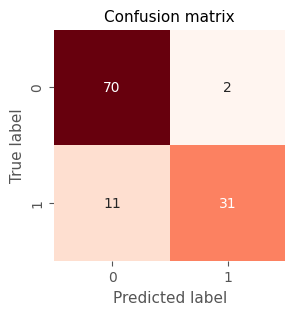

In [32]:
# Plot the confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(test_data['malignant'], predicted_test_data)
fig = plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, square=True)
plt.xlabel('Predicted label', fontsize=11)
plt.ylabel('True label', fontsize=11)
plt.title('Confusion matrix', fontsize=11)

# Print the classification report
classification_report = sklearn.metrics.classification_report(test_data['malignant'], predicted_test_data)
print(classification_report)

# Print the accuracy score
simplified_logreg_model_score = sklearn.metrics.accuracy_score(test_data['malignant'], predicted_test_data)
print(f"Accuracy score: {simplified_logreg_model_score:.4f}")

Our model can predict the diagnosis of the tumor with the accuracy of approx. 88%, using only three distinct features. This is a not a very good result, however the model is very simple and interpretable. Nevertheless, we must can compare the performance of this model using the dataset **without** feature reduction to see how feature reduction influenced the model's performance.

# Full dataset calculations

We must perform PCA and logistic regression on the full dataset to see if the feature reduction was worth it. We will use the same steps as before, but we will use the full dataset this time.

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        72
         1.0       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy score: 0.9561


Text(0.5, 1.0, 'Confusion matrix')

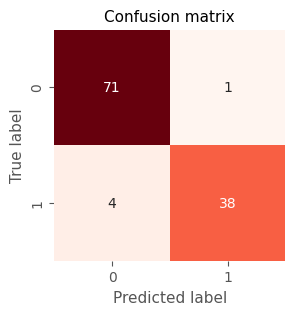

In [33]:
full_training_data, full_test_data = sklearn.model_selection.train_test_split(wisconsin_breast_cancer_data_copy, test_size=0.2, random_state=42, stratify=wisconsin_breast_cancer_data_copy['malignant'])
full_features = full_training_data.drop('malignant', axis=1)

full_pca_model = sklearn.decomposition.PCA(n_components=columns_without_diagnosis.shape[0])
full_pca_features = full_pca_model.fit_transform(full_features)
full_pca_features = pd.DataFrame(full_pca_features, columns=[
    f'PC{i + 1}' for i in range(full_pca_features.shape[1])
], index=full_training_data.index)

number_of_principal_components = cumulative_variance_explained[cumulative_variance_explained < CUMULATIVE_VARIANCE_THRESHOLD].shape[0] + 1
full_pca_features = full_pca_features.iloc[:, :number_of_principal_components]

full_logistic_regression_model = sklearn.linear_model.LogisticRegression()

start_time = time.time()
full_logistic_regression_model.fit(full_pca_features, full_training_data['malignant'])
full_logistic_regression_model_training_time = time.time() - start_time

full_test_features = full_test_data.drop('malignant', axis=1)

full_test_pca_features = full_pca_model.transform(full_test_features)
full_test_pca_features = full_test_pca_features[:, :number_of_principal_components]

full_test_pca_features = pd.DataFrame(full_test_pca_features, columns=full_pca_features.columns, index=full_test_data.index)
full_test_pca_features = full_test_pca_features.iloc[:, :number_of_principal_components]

full_predicted_test_data = sklearn.model_selection.cross_val_predict(
    full_logistic_regression_model, full_test_pca_features, full_test_data['malignant'], cv=10
)

full_classification_report = sklearn.metrics.classification_report(full_test_data['malignant'], full_predicted_test_data)
print(full_classification_report)

full_logreg_model_score = sklearn.metrics.accuracy_score(full_test_data['malignant'], full_predicted_test_data)
print(f"Accuracy score: {full_logreg_model_score:.4f}")

# Plot the confusion matrix
full_confusion_matrix = sklearn.metrics.confusion_matrix(full_test_data['malignant'], full_predicted_test_data)
fig = plt.figure(figsize=(3, 3))
sns.heatmap(full_confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, square=True)
plt.xlabel('Predicted label', fontsize=11)
plt.ylabel('True label', fontsize=11)
plt.title('Confusion matrix', fontsize=11)

We can see that the drastic reduction of features translated to a drop of accuracy of the model by appox. 7%.

This shows that feature recution can come with a stark cost in terms of model accuracy. This corresponds to the fact that the model is more complex and has more features to learn from, so it can learn the patterns in the data better. The trade-off between model complexity and accuracy is a very important concept in machine learning - especially when it comes to the topic of anomaly detection such as cancerous tumors.

We can see that the simplified model returns more false negatives, which is a very bad result, since it means that the model is not able to detect the malignant tumors - the patient would be sent home, even though they have a malignant tumor!

The threshold at which we consider our model to be of a good enough quality could be a topic of an another discussion, but anything lower that 90% is not acceptable in this case.

# Trying different model - XGBoost

We will try a different model - XGBoost. We will use the `XGBClassifier` class from the `xgboost` module to train the model. We will use the `fit` method of the `XGBClassifier` class to train the model on the training data. We will use the `predict` method of the `XGBClassifier` class to predict the diagnosis of the tumor on the testing data.

As an objective function we will use the `binary:logistic` option, since we are dealing with a binary classification problem. We will use the `eval_metric` parameter to set the evaluation metric to `logloss` - the logarithmic loss function. We will use the `early_stopping_rounds` parameter to set the number of rounds without improvement to stop the training of the model, to limit the computational resources used by the model. We will use the `verbose` parameter to set the verbosity of the model to 0, to limit the output of the model.

The maximum number of rounds is set to 1000, to limit the computational resources used by the model. To make the comparison fair, no multithreading is used.

Similarly to the `LogisticRegression` model, we will train the XGBoost model on the training data and predict the diagnosis of the tumor on the testing data. THere will be two datasets: one with feature reduction and one without.

In [34]:
import xgboost as xgb

TRAIN_ITERATIONS = 10000

reduced_eval_data_set = [(test_pca_features, test_data['malignant'])]
full_eval_data_set = [(full_test_pca_features, full_test_data['malignant'])]

global_hyperparameters = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'early_stopping_rounds': 10,
    'n_estimators': TRAIN_ITERATIONS,
    'verbosity': 0,
}

simplified_xboost_model = xgb.XGBClassifier(**global_hyperparameters)
full_xboost_model = xgb.XGBClassifier(**global_hyperparameters)

start_time = time.time()
simplified_xboost_model.fit(
    train_pca_features, train_data['malignant'],
    eval_set=reduced_eval_data_set,
)
simplified_xgboost_training_time = time.time() - start_time

start_time = time.time()
full_xboost_model.fit(
    full_pca_features, full_training_data['malignant'],
    eval_set=full_eval_data_set,
)
full_xgboost_training_time = time.time() - start_time

[0]	validation_0-logloss:0.47687
[1]	validation_0-logloss:0.39118
[2]	validation_0-logloss:0.33498
[3]	validation_0-logloss:0.30175
[4]	validation_0-logloss:0.27166
[5]	validation_0-logloss:0.26012
[6]	validation_0-logloss:0.24374
[7]	validation_0-logloss:0.23583
[8]	validation_0-logloss:0.22943
[9]	validation_0-logloss:0.22162
[10]	validation_0-logloss:0.21665
[11]	validation_0-logloss:0.21564
[12]	validation_0-logloss:0.21296
[13]	validation_0-logloss:0.21129
[14]	validation_0-logloss:0.21073
[15]	validation_0-logloss:0.20686
[16]	validation_0-logloss:0.20615
[17]	validation_0-logloss:0.20749
[18]	validation_0-logloss:0.21027
[19]	validation_0-logloss:0.21137
[20]	validation_0-logloss:0.20955
[21]	validation_0-logloss:0.21091
[22]	validation_0-logloss:0.20932
[23]	validation_0-logloss:0.20932
[24]	validation_0-logloss:0.20556
[25]	validation_0-logloss:0.20782
[26]	validation_0-logloss:0.20772
[27]	validation_0-logloss:0.20794
[28]	validation_0-logloss:0.20872
[29]	validation_0-loglos

Now we can calculate the accuracy of both XGBoost models and compare them to the accuracy of the logistic regression model.

In [35]:
# Predict the diagnosis for reduced and full models
simplified_model_predictions = simplified_xboost_model.predict(test_pca_features)
full_model_predictions = full_xboost_model.predict(full_test_pca_features)

# Print the classification report
simplified_classification_report = sklearn.metrics.classification_report(test_data['malignant'], simplified_model_predictions)
print(simplified_classification_report)

full_classification_report = sklearn.metrics.classification_report(full_test_data['malignant'], full_model_predictions)
print(full_classification_report)

# Print the accuracy score
simplified_xboost_model_score = sklearn.metrics.accuracy_score(test_data['malignant'], simplified_model_predictions)
print(f"Accuracy score: {simplified_xboost_model_score:.4f}")

full_xboost_model_score = sklearn.metrics.accuracy_score(full_test_data['malignant'], full_model_predictions)
print(f"Accuracy score: {full_xboost_model_score:.4f}")

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        72
         1.0       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        72
         1.0       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy score: 0.9298
Accuracy score: 0.9561


We can compare accuracies and training times of the logistic regression and XGBoost models to see which one is better, using the registered accuracy scores.

In [36]:
training_report = pd.DataFrame({
    'Model': ['Simplified logistic regression', 'Full logistic regression', 'Simplified XGBoost', 'Full XGBoost'],
    'Training time': [
        simplified_logistic_regression_model_training_time,
        full_logistic_regression_model_training_time,
        simplified_xgboost_training_time,
        full_xgboost_training_time
    ],
    'Accuracy score': [
        simplified_logreg_model_score,
        full_logreg_model_score,
        simplified_xboost_model_score,
        full_xboost_model_score
    ],
})
training_report['Training time'] = training_report['Training time'].apply(lambda x: f"{x*1000:.2f} ms")
training_report['Accuracy score'] = training_report['Accuracy score'].apply(lambda x: f"{x*100:.2f}%")

training_report

,Model,Training time,Accuracy score
0,Simplified logistic regression,4.94 ms,88.60%
1,Full logistic regression,3.48 ms,95.61%
2,Simplified XGBoost,548.71 ms,92.98%
3,Full XGBoost,374.29 ms,95.61%


THere are a couple of major takeaways from this comparison:

1. The XGBoost model is much better than the logistic regression model in terms of accuracy, but it is also much slower.
2. The feature reduction has a much smaller impact on the XGBoost model than on the logistic regression model.
3. Feature reduction **doesn't speed up** the training of the XGBoost model and also reduces the accuracy of the model.
4. Accuracy of logistic regression model trained on full dataset is on par with the accuracy of the XGBoost model trained on the same data.

# Conclusion

We have performed an exploratory data analysis on the Wisconsin breast cancer dataset and built a model to predict whether a tumor is benign or malignant. We have used the logistic regression and XGBoost models to predict the diagnosis of the tumor. We have also used feature reduction to reduce the dimensionality of the data and speed up the training of the model. We have compared the accuracy of the models and the impact of the feature reduction on the accuracy of the models.

The optimal middle ground between speed and accuracy would be the logistic regression model trained on the full dataset, since it has the best accuracy and the best speed. However, the XGBoost model trained on the full dataset is also a very good choice, when the training time is not of the utmost importance.

## Why would we use the reduced dataset at all?

Using the reduced dataset composed of two principal components makes the visualization of data simpler at the cost of speed and accuracy of the training. However, reduction of features necessary for the model to learn can lead to savings in terms of time needed to collect the data on the side of medical staff. This argument, in case of medical treatment and diagnosis, can be very dangerous since false negatives would lead to loss of health and/or life of a patient, but in more general cases, it can be a very good trade-off.